##  Session Tittle : Data Viulization and EDA



### In this Notebook we'll Understand how to performe EDA step by step.


### A Lot to know, A Lot to discuss... Lets Begin

![](https://i.gifer.com/7RQq.gif)

## Zomato Dataset Exploratory Data Analysis

- url: contains the url of the restaurant in the zomato website

- address=contains the address of the restaurant in Bengaluru

- name: contains the name of the restaurant

- online_order=whether online ordering is available in the restaurant or not

- book_table=table book option available or not

- rate=contains the overall rating of the restaurant out of 5

- votes=contains total number of rating for the restaurant as of the above mentioned date

- phone=contains the phone number of the restaurant

- location=contains the neighborhood in which the restaurant is located

- rest_type=restaurant type

- dish_liked=dishes people liked in the restaurant

- cuisines=food styles, separated by comma

- approx_cost(for two people)=contains the approximate cost for meal for two people

- reviews_list=list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer
 
- menu_item=contains list of menus available in the restaurant

- listed_in(type)=type of meal

- listed_in(city)contains the neighborhood in which the restaurant is listed

In [1]:
# Import all required Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data in data usig data.read_csv.
data=pd.read_csv('zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Data Cleaning


![](https://i.gifer.com/2JU.gif)

In [47]:
#size before cleaning
data.shape

(51717, 17)

In [48]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [3]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

**As we can observe, We don't need columns like 'url','phone' etc. as they cant be used to analyse the data**

**So we will simply drop it**

In [4]:
# droping all unnecessary columns
data=data.drop(['url','address','phone','dish_liked','reviews_list','menu_item'], axis=1)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


# new Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


# Checking for Duplicates

In [6]:
# drop duplicares if any
data.drop_duplicates(inplace = True)
data.shape

(51609, 11)

In [7]:
data.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7755
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     344
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [8]:
data.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
rest_type                      object
cuisines                       object
approx_cost(for two people)    object
listed_in(type)                object
listed_in(city)                object
dtype: object

# EDA Steps- Analysizing each Column

![](https://i.gifer.com/7yrz.gif)

### Analysing Rating column 

In [9]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#### we can se there are some faulty values like NEW and - in data and apart from that other values are in form like 3.3/5 but we need float values like 3.3

# Function to remove 'new' and '-' and '/5' fro, rating

In [10]:
# We define a function 
def handlerate(value):
    # If value is equal to "NEW" or '-' than just remove the values
    if(value=='NEW' or value=='-'):
        return np.nan
    # else split the value for example 
    else:
        # "3.3/5" will split it into 3.3 amd /5 ...  value=[3.3][/5]
        value=str(value).split('/')
        # 3.3 is the first element of the the list so we'll excess it by using value[0]
        value=value[0]
        # return it by converting it from string to float
        return float(value)

# apply the function on data.rate    
data.rate=data['rate'].apply(handlerate)
data.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [11]:
data.rate.isnull().sum()

10019

# Dealing with NULL values
we will fill null values with the average rating

![](https://i.gifer.com/2GU.gif)

In [12]:
# data.fillna is used to fill NaN values and we have filled them with the mean values of raing
data.rate.fillna(data.rate.mean(), inplace=True)
# check is any null values left
data.rate.isnull().sum()

0

# NULL values of other columns can't be predicted as they are strings so we will drop them

In [13]:
data.dropna(inplace=True)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [14]:
# we have no null value left now
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [15]:
data.shape

(51042, 11)

# Cost columns Analysis

In [16]:
# as name of the column is very long we will simply change it
data.rename(columns = {'approx_cost(for two people)':'Cost2Plates','listed_in(type)':'Type'},inplace=True)
data.head()
# city and location both contain address so dropping one

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [17]:
# city and location both contain address so dropping one
data=data.drop(['listed_in(city)'],axis=1)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


# Analysing cost2plates column

In [18]:
data.Cost2Plates.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

#### We can see values grater than 999 have "," in it
For example: 9,945  but we need values in int forms example: 9945


# Function to remove the ',' and converting it into float

In [19]:
def handlecost(value):
    value=str(value)
    if ',' in value:
        # we are simpling Replacing "," With no value ""
        value= value.replace(',','')
        return int(value)
    else:
        return int(value)
    
data.Cost2Plates=data.Cost2Plates.apply(handlecost)
data.Cost2Plates.unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
       3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000, 3700,
       1650, 2700, 4500,  140], dtype=int64)

In [20]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


# Analysing rest_type Column

In [24]:
data.sample()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,Type
1619,Fresh Code,No,No,3.700142,0,Bannerghatta Road,"Takeaway, Delivery","Chinese, North Indian",300,Delivery


In [27]:
# This function return how many times a values is coming in dataframe
# For example quick Bites types of resturents are coming 19010 times
data.rest_type.value_counts()

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Pop Up                            2
Food Court, Beverage Shop         2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

# Creating new category
##### The resturent types that have low occurance, we will club them together to a category called "others

##### For example Dessert parlor is coming only 2 times so we with define it as other type of resturent

In [31]:
rest_types= data.rest_type.value_counts()
# Storing all the resturent types that have accured less than 500 times in the dataframes
rest_type_lessthan_500= rest_types[rest_types<500]
rest_type_lessthan_500

Sweet Shop                    468
Bar, Casual Dining            411
Lounge                        395
Pub                           355
Fine Dining                   345
                             ... 
Dessert Parlor, Kiosk           2
Pop Up                          2
Food Court, Beverage Shop       2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 82, dtype: int64

# as lots of types have few resaturants we will add them in Other

In [32]:
def handle_rest_type(value):
    # if value is in the list then change it to other
    if(value in rest_type_lessthan_500):
        return 'others'
    else:
        return value
    
data.rest_type=data.rest_type.apply(handle_rest_type)
data.rest_type.value_counts()

Quick Bites           19010
Casual Dining         10253
others                 6838
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Beverage Shop           863
Bar                     686
Food Court              616
Name: rest_type, dtype: int64

In [33]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


# Analyse the Location Column

In [71]:
data.location.value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

# Doing same thing what we did with Resturent types

In [34]:
locations = data.location.value_counts()
location_less_than_500= locations[locations<500]
location_less_than_500

# make function to handle the location less thn 500
def handle_location(value):
    if value in location_less_than_500 :
        return 'others'
    else:
        return value
    
data.location=data.location.apply(handle_location)
data.location.value_counts()

others                   8007
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

In [35]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


# Analysing cusines coulmn

In [37]:
cuisiness = data.cuisines.value_counts()
cuisiness

North Indian                                 2852
North Indian, Chinese                        2351
South Indian                                 1820
Biryani                                       903
Bakery, Desserts                              898
                                             ... 
Continental, South Indian, North Indian         1
Biryani, North Indian, Rolls                    1
Cafe, Healthy Food, Beverages                   1
Biryani, Kebab, South Indian                    1
North Indian, Bengali, Chinese, Beverages       1
Name: cuisines, Length: 2704, dtype: int64

In [40]:
cuisiness_less_than_100= cuisiness[cuisiness<100]
#cuisiness_less_than_100

# make function to handle the location less thn 100
def handle_cuisiness(value):
    if value in cuisiness_less_than_100:
        return 'others'
    else:
        return value
data.cuisines=data.cuisines.apply(handle_cuisiness)
data.cuisines.value_counts()

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
South Indian, Fast Food                  104
North Indian, Mughlai, Chinese           104
North Indian, Chinese, Seafood           102
Italian, Pizza                           102
Name: cuisines, Length: 70, dtype: int64

# Analysing types column

In [77]:
data.Type.value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: Type, dtype: int64

#### data.Type is already very clean

#  Data is cleaned now we can start Visualization ##

![](https://i.gifer.com/ZEVP.gif)

# Data Visualization

In [41]:
data.sample()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,Type
9534,Sree Food Paradise,No,No,3.700142,0,BTM,Quick Bites,"North Indian, Biryani",150,Delivery


### Visualizing the location

In [99]:
data.location.value_counts()

others                   8007
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

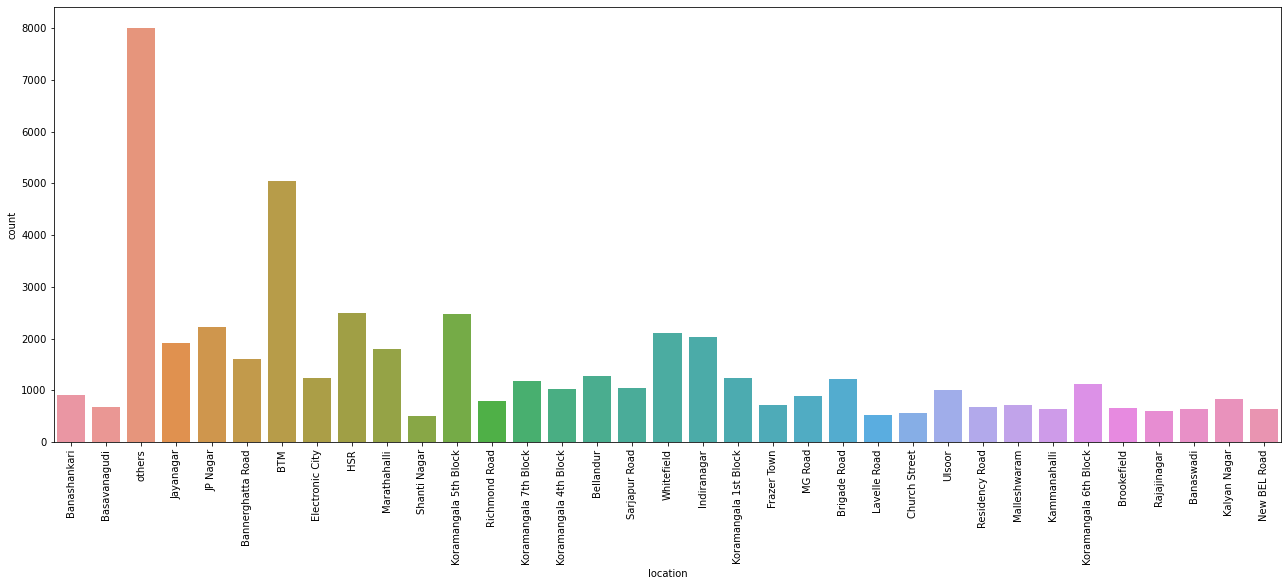

In [49]:
# Count plot is used to count the total values for a row
# for example it is showing there are 5000+ resturent in BTM
plt.figure(figsize=(22,8))
ax= sns.countplot(data = data , x = 'location')
plt.xticks(rotation=90) #rotate the lable so the dont overlap
plt.show()

### Visualizing the Online order

In [102]:
data.online_order.value_counts()

Yes    30228
No     20814
Name: online_order, dtype: int64

C:\Users\96654\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order', ylabel='count'>

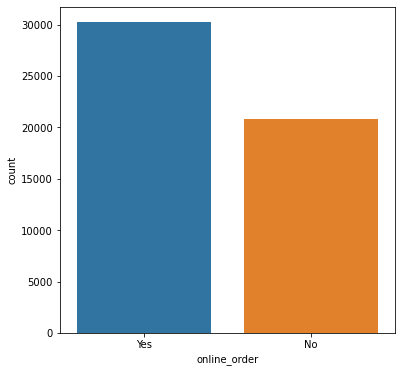

In [81]:
# Showing how many resturent have Online Order Facility
plt.figure(figsize=(6,6))
sns.countplot(data.online_order )

<AxesSubplot:xlabel='online_order', ylabel='rate'>

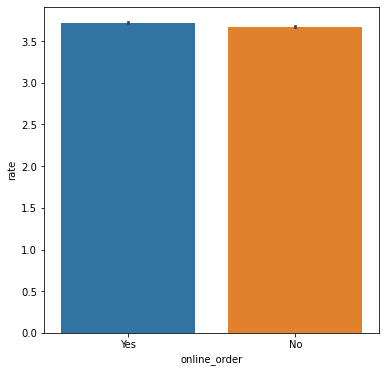

In [51]:
plt.figure(figsize=(6,6))
sns.barplot(x = data.online_order , y = data.rate)

<AxesSubplot:xlabel='online_order', ylabel='votes'>

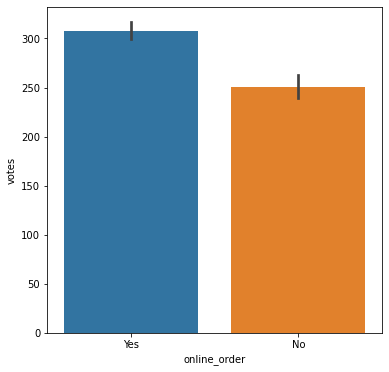

In [106]:
plt.figure(figsize=(6,6))
sns.barplot(x = data.online_order , y = data.votes)

In [107]:
data.sample()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,Type
51593,The South,No,No,3.7,21,Whitefield,Quick Bites,South Indian,200,Dine-out


<AxesSubplot:xlabel='online_order', ylabel='count'>

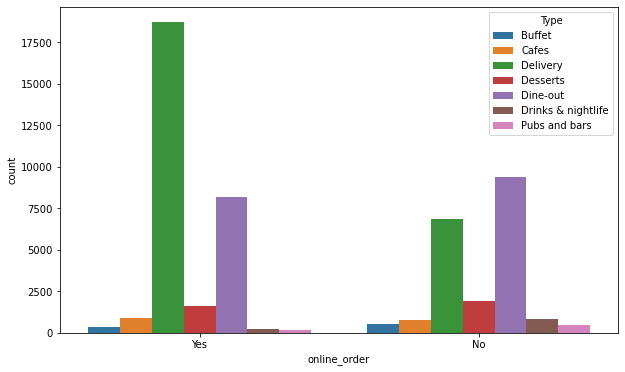

In [109]:
plt.figure(figsize=(10,6))
sns.countplot(x = data.online_order , hue = data.Type )

<AxesSubplot:xlabel='online_order', ylabel='count'>

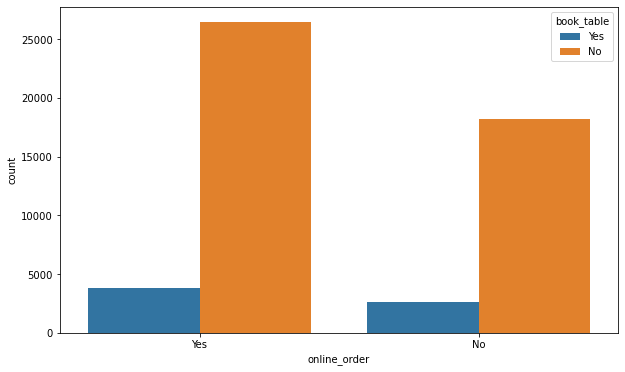

In [110]:
plt.figure(figsize=(10,6))
sns.countplot(x = data.online_order , hue = data.book_table )

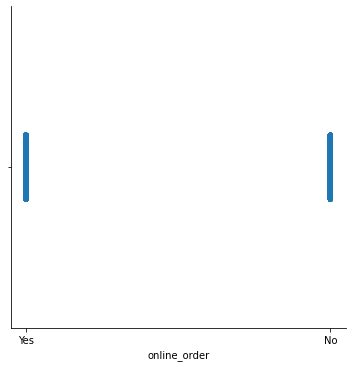

In [53]:
sns.catplot( data = data ,  x = "online_order")
plt.show()

### Visualizing the Book Table

C:\Users\96654\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_table', ylabel='count'>

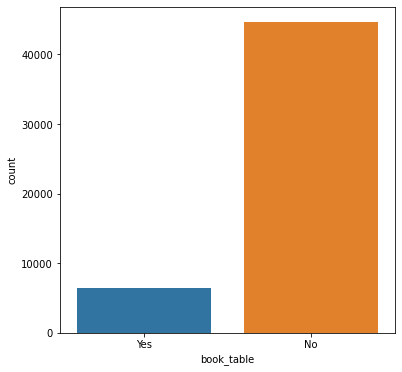

In [82]:
# Showing how many resturent have Book Table Facility
plt.figure(figsize=(6,6))
sns.countplot(data.book_table)

<AxesSubplot:xlabel='book_table', ylabel='count'>

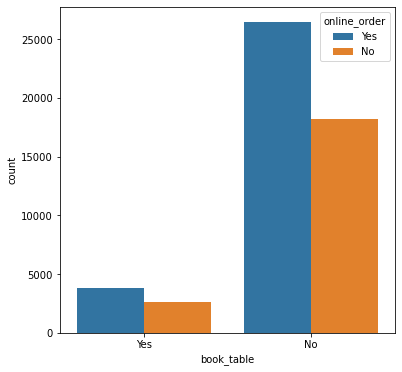

In [124]:
plt.figure(figsize=(6,6))
sns.countplot(x = data.book_table , hue = data.online_order)

<AxesSubplot:xlabel='book_table', ylabel='votes'>

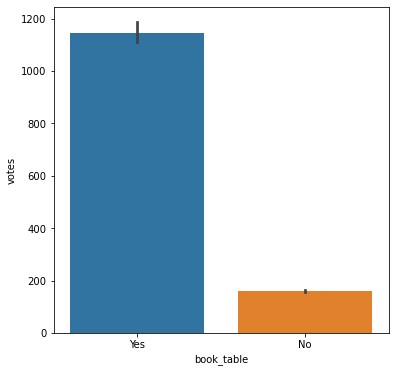

In [125]:
plt.figure(figsize=(6,6))
sns.barplot(x = data.book_table , y = data.votes)

<AxesSubplot:xlabel='book_table', ylabel='rate'>

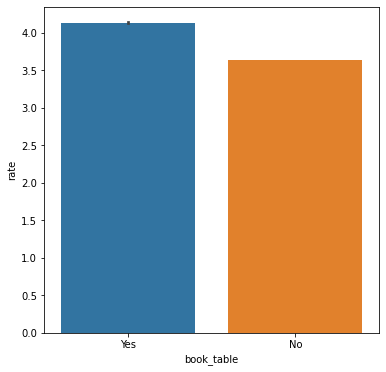

In [126]:
plt.figure(figsize=(6,6))
sns.barplot(x = data.book_table , y = data.rate)

<AxesSubplot:xlabel='book_table', ylabel='Cost2Plates'>

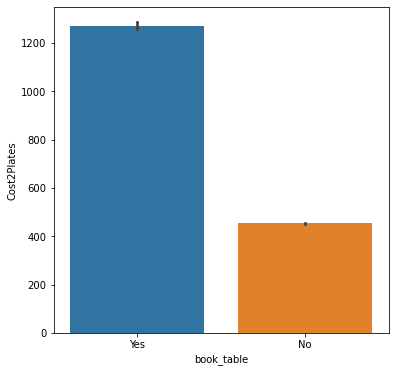

In [129]:
plt.figure(figsize=(6,6))
sns.barplot(x = data.book_table , y = data.Cost2Plates)

In [128]:
data.sample()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,Type
47898,Ambur Hot Dum Biryani,No,No,3.1,6,Shanti Nagar,Quick Bites,"Biryani, Kebab",250,Delivery


## Visualization online order vs rate

#### To compare to columns we ofter use Boxplot, Barplot,ScatterPLot, Violinplot


<AxesSubplot:xlabel='online_order', ylabel='rate'>

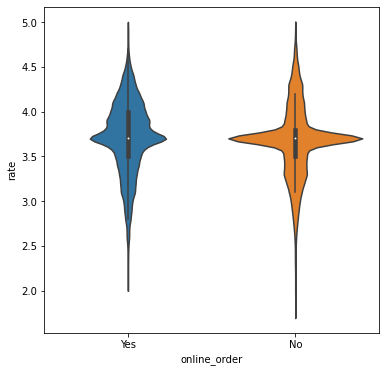

In [83]:
# TO Violinplot is used to to find value as well as distribution
plt.figure(figsize=(6,6))
sns.violinplot(x='online_order', y='rate', data=data)

<AxesSubplot:xlabel='rate', ylabel='Count'>

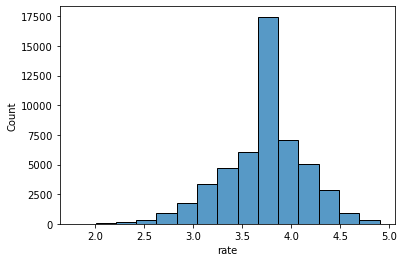

In [55]:
sns.histplot(x = data.rate , bins = 15)

<AxesSubplot:xlabel='votes', ylabel='Count'>

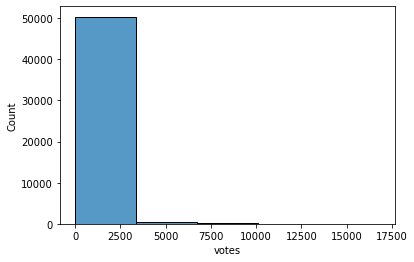

In [56]:
sns.histplot(x = data.votes , bins = 5)

<AxesSubplot:xlabel='Cost2Plates', ylabel='Count'>

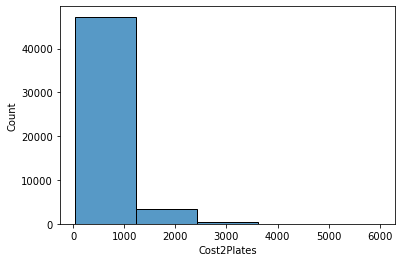

In [57]:
sns.histplot(x = data.Cost2Plates , bins = 5)

# Visualization Book table vs rate

#### Boxplot is also used to find the outliers of the data, While traing a ML model

<AxesSubplot:xlabel='book_table', ylabel='rate'>

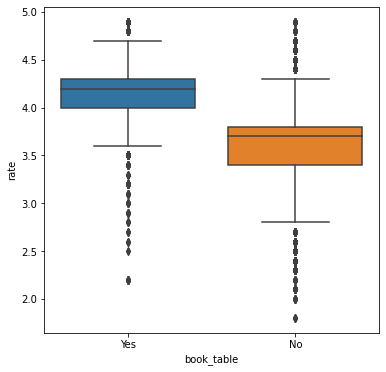

In [84]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table', y='rate', data=data)

# Visualization online order vs locatione

#### For this we have to learn how to group the DATA

### I want to see how many resturent provide online order based on location
#### step 1: First Thing I will do is to group the dataframe with location and online order===> data.grpupby['loaction','online_order'])
#### Step 2: After grouping we will select the parameter on which we will apply function such as count(),avg() ===> data.grpupby['loaction','online_order'])['name']
#### Step 3: At last we select the function we want to apply, In this case we need to find no. of resturents so we will use count() ===> data.grpupby['loaction','online_order'])['name'].count()

In [58]:
data.sample()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2Plates,Type
22216,RK Fresh Food,Yes,No,3.5,13,BTM,Quick Bites,Fast Food,300,Delivery


In [60]:
df1=data.groupby(['location','online_order'])['name'].count()
df1

location      online_order
BTM           No              1763
              Yes             3293
Banashankari  No               397
              Yes              505
Banaswadi     No               302
                              ... 
Ulsoor        Yes              622
Whitefield    No               986
              Yes             1119
others        No              3672
              Yes             4335
Name: name, Length: 70, dtype: int64

In [61]:
# To plot the data we nwwd to do these steps
# Save the new data frame in csv formate
df1.to_csv('location_online.csv')
# read the data frame
df1=pd.read_csv('location_online.csv')
df1

,location,online_order,name
0,BTM,No,1763
1,BTM,Yes,3293
2,Banashankari,No,397
3,Banashankari,Yes,505
4,Banaswadi,No,302
...,...,...,...
65,Ulsoor,Yes,622
66,Whitefield,No,986
67,Whitefield,Yes,1119
68,others,No,3672


In [147]:
# create a pivote table with location as index and online order as column
df1=pd.pivot_table(df1, values=None,index='location',columns='online_order',fill_value=0,aggfunc=np.sum)
# Table will look like this
df1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Ulsoor                  389   622
Whitefield              986  1119
others                 3672  4335

<AxesSubplot:xlabel='location'>

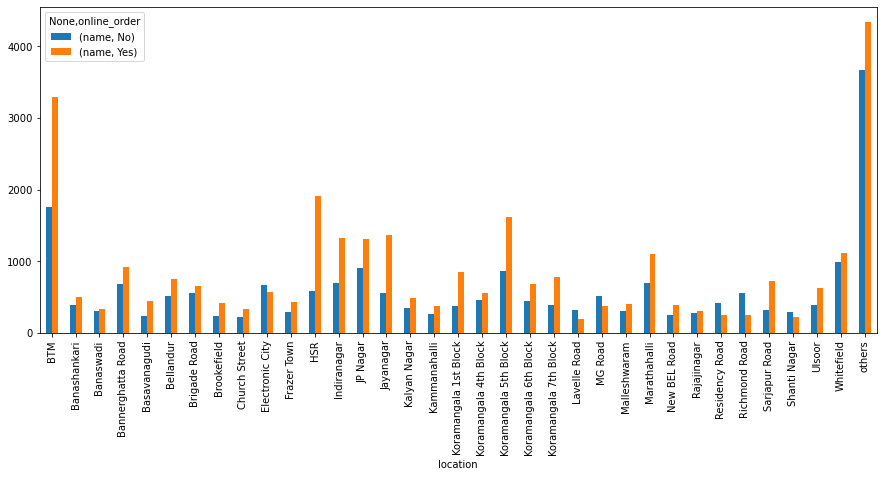

In [148]:
df1.plot(kind='bar', figsize=(15,6))

# Visualization Book table vs location

#### Same Process we did above

In [149]:
data2=data.groupby(['book_table','location'])['name'].count()
data2.to_csv('book_table.csv')
data2=pd.read_csv('book_table.csv')
data2=pd.pivot_table(data2, values=None,index='location',columns='book_table',fill_value=0,aggfunc=np.sum)
data2

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Ulsoor                  834  177
Whitefield             1852  253
others                 7204  803

<AxesSubplot:xlabel='location'>

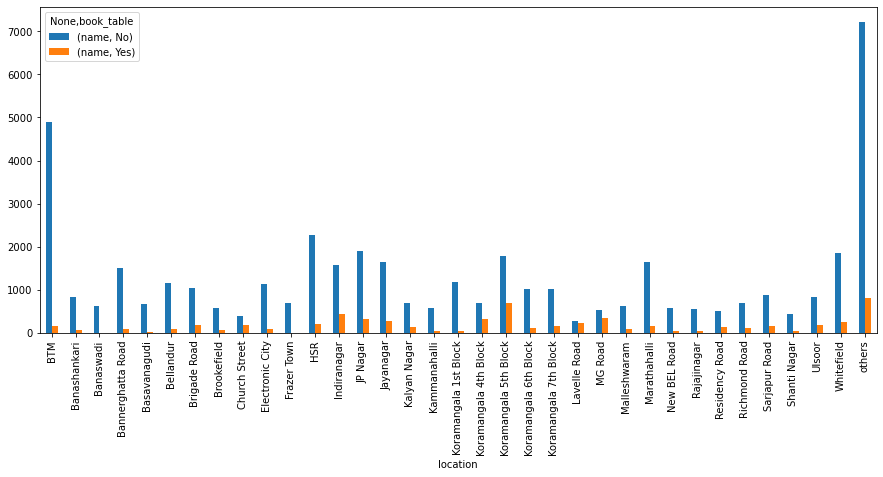

In [150]:
data2.plot(kind='bar', figsize=(15,6))

# Visualization types of resturent vs rate

<AxesSubplot:xlabel='Type', ylabel='rate'>

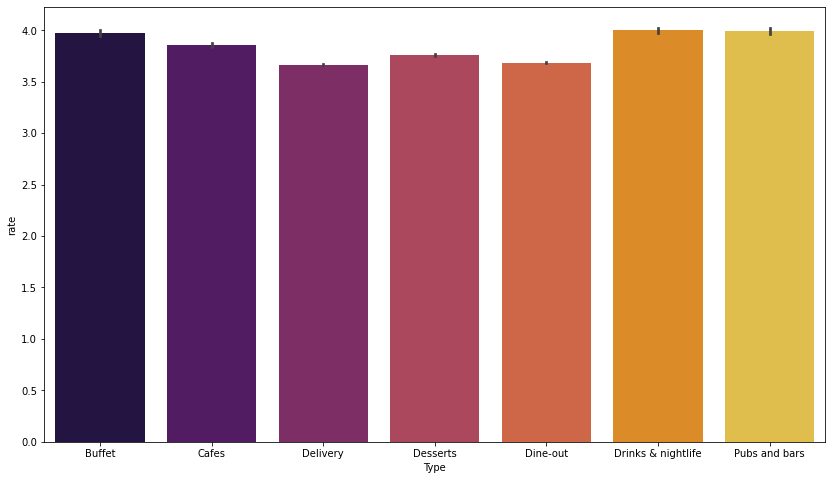

In [152]:
plt.figure(figsize=(14,8))
sns.barplot(x = 'Type', y='rate', data=data, palette='inferno')

# Visualization Types of rest vs location

In [90]:
data3=data.groupby(['Type','location'])['name'].count()
data3.to_csv('book_table.csv')
data3=pd.read_csv('book_table.csv')
data3=pd.pivot_table(data3, values=None,index='location',columns='Type',fill_value=0,aggfunc=np.sum)
data3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
others                   150   225     4062      512     2792   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar                           65            66  
JP Nagar                              51             7  
Jayanagar                             12             0  
Kalyan Nagar                          18             0  
Kammanahalli                           6             0  
Koramangala 1st Block                  7            16  
Koramangala 4th Block                 62            34  
Koramangala 5th Block                 84            58  
Koramangala 6th Block                 51            23  
Koramangala 7th Block                 25            25  
Lavelle Road                          59            34  
MG Road                               53            36  
Malleshwaram  

<AxesSubplot:xlabel='location'>

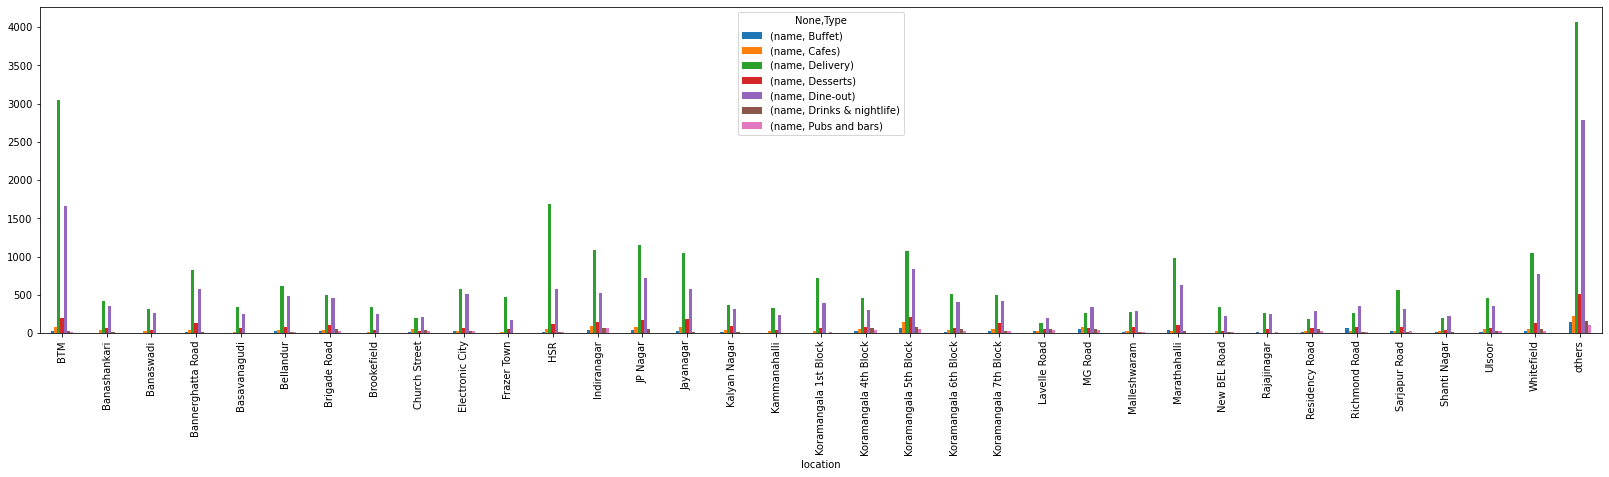

In [91]:
data3.plot(kind='bar', figsize=(28,6))

# Visualization votes vs location

In [64]:
data4=data[['votes','location']]

data4.drop_duplicates()

data5=data4.groupby(['location'])['votes'].sum()
data5=data5.to_frame()

# we have sorted the  Data
data5=data5.sort_values('votes',ascending=False)
data5.head()

,votes
location,
Koramangala 5th Block,2214083
others,1410176
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306


C:\Users\96654\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


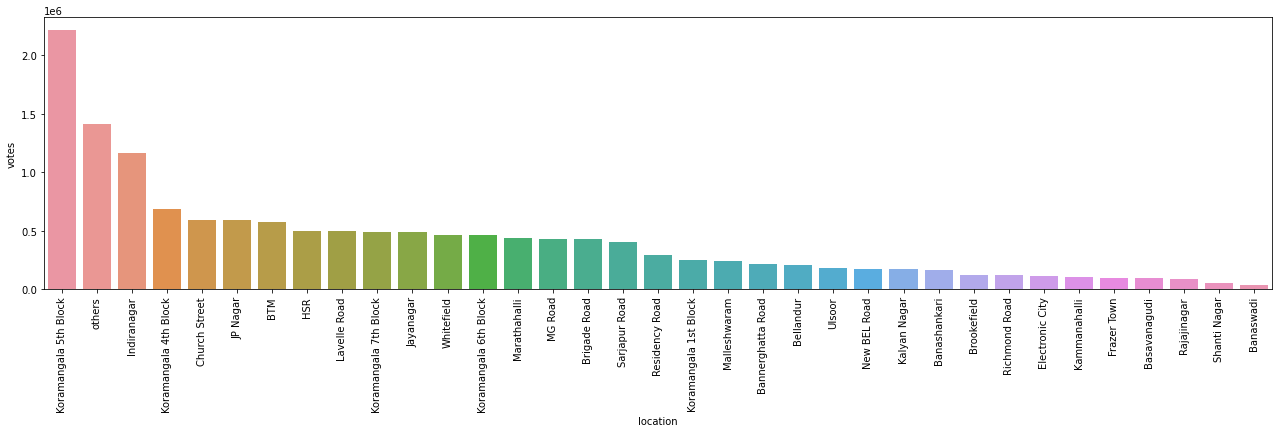

In [93]:
plt.figure(figsize=(22,5))
sns.barplot(data5.index,data5.votes)
plt.xticks(rotation=90)
plt.show()

# Visulizing top cuisiens

### GroupBy feature is very importent

In [94]:
data6=data[['votes','cuisines']]
data6.drop_duplicates()
data7=data6.groupby(['cuisines'])['votes'].sum()
data7=data7.to_frame()
data7=data7.sort_values('votes',ascending=False)
data7.head()

,votes
cuisines,
others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [65]:
data.corr()

,rate,votes,Cost2Plates
rate,1.000000,0.428384,0.365676
votes,0.428384,1.000000,0.380882
Cost2Plates,0.365676,0.380882,1.000000


<AxesSubplot:>

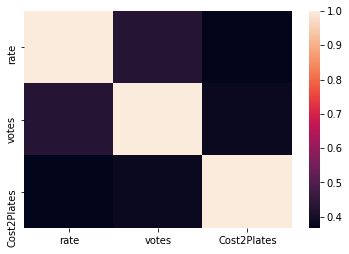

In [66]:
sns.heatmap(data.corr())

# That is all from my side... Thanks a Lot

![](https://i.gifer.com/1kQ.gif)